In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18_arXiv_v2 as cosmo
import astropy.units as u
import fkplotlib

fkplotlib.use_txfonts()

<IPython.core.display.Javascript object>


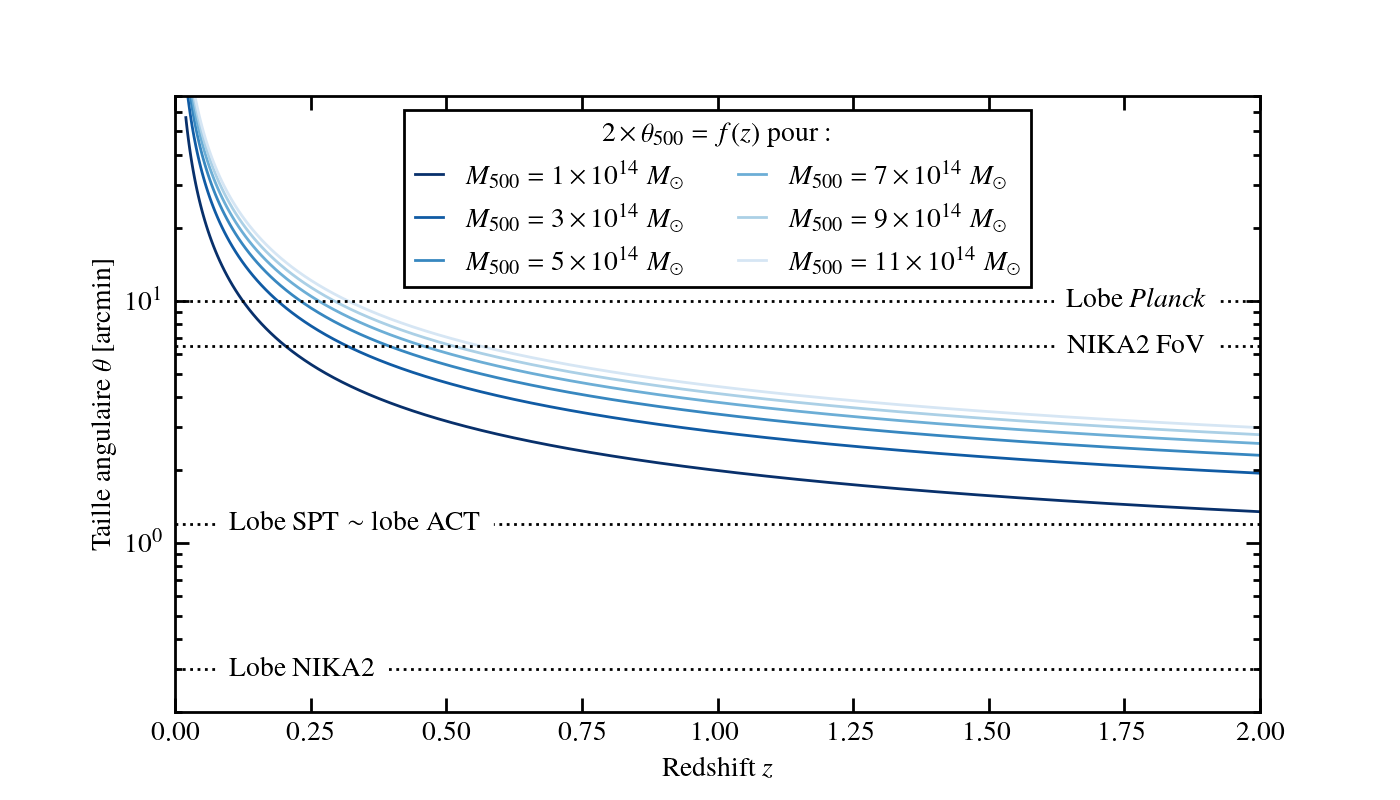

In [17]:
plt.close("all")
def axhline(x, y, label, ax, zorder=10):
    ax.axhline(y, 0, 1, color="k", ls=":")
    ax.text(
        x, y, label, 
        ha="right" if x > 1 else "left", va="center", bbox={"facecolor": "w", "edgecolor": "w"}, zorder=zorder
    )

z = np.logspace(np.log10(2e-2), np.log10(3), 100)
d_a = cosmo.angular_diameter_distance(z).to("Mpc")

#radii = np.arange(600, 1600, 200) * u.kpc
masses = np.arange(1, 12, 2) * 1e14 * u.Msun

fig, ax = plt.subplots(figsize=(7, 4))
axhline(1.9, 10., r"Lobe \textit{Planck}", ax)
axhline(1.9, 6.5, "NIKA2 FoV", ax)
axhline(0.1, 1.2, "Lobe SPT $\sim$ lobe ACT", ax)
axhline(0.1, 18./60., "Lobe NIKA2", ax)

for i, m in enumerate(masses):
    r = ((3 * m) / (4 * np.pi * 500 * cosmo.critical_density(z))) ** (1/3)
    r = 2.0 * r.to("Mpc")
    d_a = cosmo.angular_diameter_distance(z).to("Mpc")
    theta = np.arctan((r / d_a).value) * u.rad.to("arcmin")
    ax.plot(z, theta, label="$M_{500} = " + f"{m.value / 1e14:.0f}" + r" \times 10^{14} \; M_\odot$", 
            color=plt.cm.Blues_r((i) / (len(masses))), zorder=1)
    
#ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_xlim(9e-2, 2.1)
ax.set_xlim(0, 2)
ax.set_ylim(0.2, 70)
ax.set_xlabel(r"Redshift $z$")
ax.set_ylabel(r"Taille angulaire $\theta$ [arcmin]")
fkplotlib.ax_bothticks(ax)
fkplotlib.ax_legend(ax, ncol=2, title=r"$2 \times \theta_{500} = f(z)$ pour :", handlelength=1, loc="upper center")
fig.savefig("angular_sizes.pdf")

# Rapport entre t500 à deux redshifts

In [13]:
def r500(m500, z):
    return ((3 * m500) / (4 * np.pi * 500 * cosmo.critical_density(z))) ** (1/3)
def theta500(m500, z):
    r = r500(m500, z).to("Mpc")
    d_a = cosmo.angular_diameter_distance(z).to("Mpc")
    return np.arctan((r / d_a).value) * u.rad.to("arcmin")

theta500(3e14 * u.Msun, 0.5) / theta500(3e14 * u.Msun, 2.0)

2.366790525339391